# QUESTION 5: Influence of environmental conditions in changing morphological data.
### **Author:** Milinda Basavaraju - M6
### **Description:** 
Here we check the behaviour of shape data (Shape factor, Elongation, Sphericity)
over time linking it to the climatic data indicated by isotopes of Oxygen and Carbon.


First, we merge the foraminiferal shape data with environmental isotopic data (δ¹⁸O and δ¹³C) by aligning them based on a common time reference (Age in Ma). Since the sampling rates differ between the datasets, interpolation is used to estimate the isotopic values at the same ages recorded for shape measurements.

In [44]:
import pandas as pd
from scipy.interpolate import interp1d

#Loading the data
shape_df = pd.read_excel("C:/Users/basav/OneDrive/Documents/DSMP-M6/dsmp-2024-group-m6/data/combined_metrics.xlsx")  # Must include 'Age' and 'ShapeFactor'
env_df = pd.read_csv("C:/Users/basav/OneDrive/Documents/DSMP-M6/dsmp-2024-group-m6/data/TableS34.tab", sep="\t", skiprows=22)  # Must include 'Tuned time [Ma]', 'δ18O', 'δ13C'
print("Environmental Data Columns:", env_df.columns.tolist())
print("Shape Data Columns:", shape_df.columns.tolist())
# Standardizing the column names for merging
shape_df.rename(columns={"Age(Ma)": "Ma", "Size.Mean.ShapeFactor": "ShapeFactor"}, inplace=True)
env_df.rename(columns={
    "Tuned time [Ma]": "Ma",
    "Foram benth δ18O [‰ PDB] (ISOBENd18oLOESSsmoothLongTerm)": "d18O",
    "Foram benth δ13C [‰ PDB] (ISOBENd13cLOESSsmoothLongTerm)": "d13C"
}, inplace=True)

# Interpolating Environmental Data to Match Shape Data Ages 
interp_d18O = interp1d(env_df["Ma"], env_df["d18O"], bounds_error=False, fill_value="extrapolate")
interp_d13C = interp1d(env_df["Ma"], env_df["d13C"], bounds_error=False, fill_value="extrapolate")


# Applying interpolation to shape data
shape_df["d18O"] = interp_d18O(shape_df["Ma"])
shape_df["d13C"] = interp_d13C(shape_df["Ma"])


# Writing the merged data to a new CSV file
shape_df.to_csv("../data/shape_env_merged.csv", index=False)
print(shape_df.head())


Environmental Data Columns: ['Tuned time [Ma]', 'Foram benth [#] (ISOBENbinned_d13Ccount)', 'Foram benth δ13C [‰ PDB] (ISOBENbinned_d13C)', 'Foram benth δ13C [‰ PDB] (ISOBENbinned_d13Cinterp)', 'Foram benth [#] (ISOBENbinned_d18Ocount)', 'Foram benth δ18O [‰ PDB] (ISOBENbinned_d18O)', 'Foram benth δ18O [‰ PDB] (ISOBENbinned_d18Ointerp)', 'Foram benth δ13C [‰ PDB] (ISOBENd13cLOESSsmooth)', 'Foram benth δ18O [‰ PDB] (ISOBENd18oLOESSsmooth)', 'Comment (error)', 'Foram benth δ13C [‰ PDB] (ISOBENd13cLOESSsmoothLongTerm)', 'Foram benth δ18O [‰ PDB] (ISOBENd18oLOESSsmoothLongTerm)', 'Comment (ISOBENLOESSsmooth_pts)']
Shape Data Columns: ['Key', 'Age(Ma)', 'FileName', 'Size.Mean.Area', 'Size.Mean.GrayIntensity', 'Size.Mean.ShapeFactor', 'Size.Mean.DiameterMin', 'Size.Mean.DiameterMax', 'Size.Mean.DiameterMean', 'Size.Mean.Elongation', 'Size.Mean.Sphericity', 'Size.Mean.Perimeter', 'Size.sd.Area', 'Size.sd.GrayIntensity', 'Size.sd.ShapeFactor', 'Size.sd.DiameterMin', 'Size.sd.DiameterMax', 'Siz

Before proceeding with analysis, it is important to verify the integrity of the interpolated environmental data. This step ensures there are no missing (NaN) values and provides a basic statistical overview of the δ¹⁸O and δ¹³C distributions.

We check the number of missing (NaN) values in the interpolated columns of d18O and d13C and ensuring that there are no missing data is crucial for accurate correlation and regression analysis.

And then we calculate key statistics like mean, standard deviation, minimum, and maximum values. This confirms that interpolated values are reasonable and within expected ranges compared to raw environmental data.

In [ ]:
# Checking for NaN values in the interpolated columns
nan_counts = shape_df[['d18O', 'd13C']].isna().sum()

# Calculating basic statistics for the interpolated columns to compare
stats = shape_df[['d18O', 'd13C']].describe()

nan_counts, stats


(d18O    0
 d13C    0
 dtype: int64,
              d18O        d13C
 count  769.000000  769.000000
 mean     3.994859   -0.464936
 std      0.400814    0.143479
 min      3.220934   -0.780586
 25%      3.825671   -0.554118
 50%      4.001856   -0.489760
 75%      4.352534   -0.395837
 max      4.611163   -0.142023)

To check whether Shape Factor is influenced by environmental conditions, we calculate the Pearson correlation coefficient between Shape Factor and the isotopic variables δ¹⁸O and δ¹³C.
Understanding the correlation between Shape Factor and climate proxies (δ¹⁸O and δ¹³C) helps reveal whether morphological changes in foraminifera are influenced by long-term climatic variability.

In [43]:
# Calculating the Correlation between shape factor and isotopes
corr_d18O = shape_df["ShapeFactor"].corr(shape_df["d18O"])
corr_d13C = shape_df["ShapeFactor"].corr(shape_df["d13C"])

print(f"Correlation with δ18O: {corr_d18O:.3f}")
print(f"Correlation with δ13C: {corr_d13C:.3f}")


Correlation with δ18O: -0.477
Correlation with δ13C: 0.386


To visualise the relationship between Shape Factor and the isotopic variables δ¹⁸O and δ¹³C, scatter plots are created. These plots help identify potential linear trends, clusters, or anomalies that are not always evident from correlation coefficients alone.

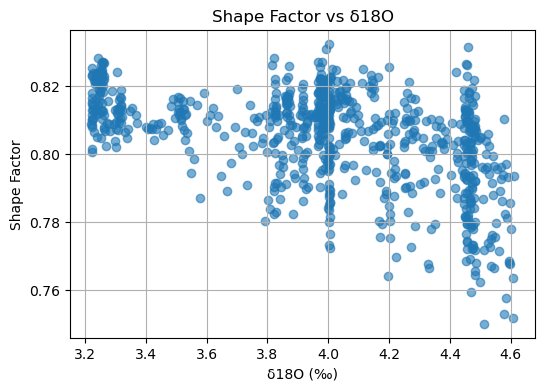

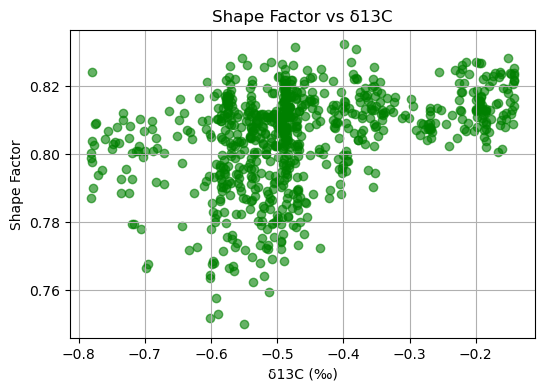

In [46]:
import matplotlib.pyplot as plt

#  Shape Factor vs δ18O
plt.figure(figsize=(6, 4))
plt.scatter(shape_df["d18O"], shape_df["ShapeFactor"], alpha=0.6)
plt.xlabel("δ18O (‰)")
plt.ylabel("Shape Factor")
plt.title("Shape Factor vs δ18O")
plt.grid(True)
plt.show()

# Shape Factor vs δ13C
plt.figure(figsize=(6, 4))
plt.scatter(shape_df["d13C"], shape_df["ShapeFactor"], alpha=0.6, color='green')
plt.xlabel("δ13C (‰)")
plt.ylabel("Shape Factor")
plt.title("Shape Factor vs δ13C")
plt.grid(True)
plt.show()


To analyze how Shape Factor and δ¹⁸O vary together over geological time, we plot a dual-axis time series plot. This allows simultaneous visualization of morphological changes and climatic conditions over millions of years.

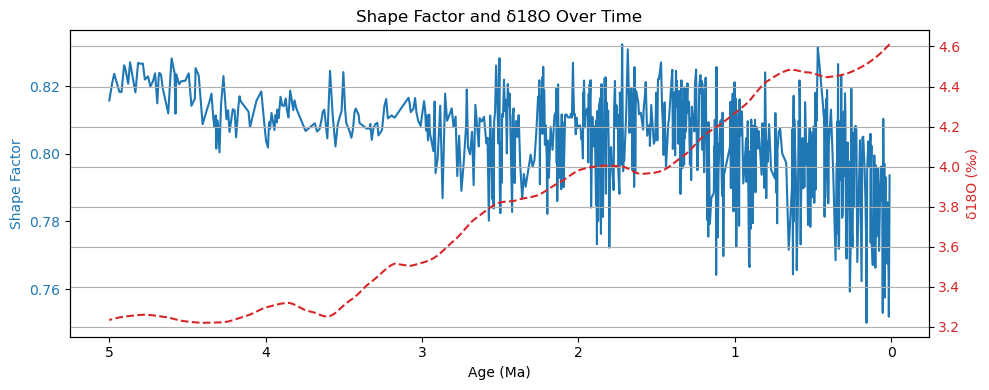

In [27]:
# Dual-axis time series
fig, ax1 = plt.subplots(figsize=(10, 4))

ax1.set_xlabel("Age (Ma)")
ax1.set_ylabel("Shape Factor", color="tab:blue")
ax1.plot(shape_df["Ma"], shape_df["ShapeFactor"], color="tab:blue", label="Shape Factor")
ax1.invert_xaxis()  # Geological time moves from past to present
ax1.tick_params(axis='y', labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("δ18O (‰)", color="tab:red")
ax2.plot(shape_df["Ma"], shape_df["d18O"], color="tab:red", linestyle="--", label="δ18O")
ax2.tick_params(axis='y', labelcolor="tab:red")

plt.title("Shape Factor and δ18O Over Time")
plt.grid(True)
plt.tight_layout()
plt.show()


This plot shows how shape evolution aligns with climatic shifts over millions of years and identifies the periods where changes in Shape Factor correlate with δ¹⁸O trends i.e cooling or warming phases.

To investigate how Elongation  and Spherecity of foraminiferal species relates to climatic conditions, we calculate the Pearson correlation coefficient between Elongation and the isotopic proxies δ¹⁸O and δ¹³C.

In [ ]:
# Calculating Correlation between Elongation and isotopes
corr_d18O_elongation = shape_df["Size.Mean.Elongation"].corr(shape_df["d18O"])
corr_d13C_elongation = shape_df["Size.Mean.Elongation"].corr(shape_df["d13C"])

print(f"Correlation of Elongation with δ18O: {corr_d18O_elongation:.3f}")
print(f"Correlation of Elongation  with δ13C: {corr_d13C_elongation:.3f}")


Correlation of Elongation with δ18O: 0.685
Correlation of Elongation  with δ13C: -0.595


In [47]:
# Correlation between Spherecity and isotopes
corr_d18O_sphericity = shape_df["Size.Mean.Sphericity"].corr(shape_df["d18O"])
corr_d13C_sphericity = shape_df["Size.Mean.Sphericity"].corr(shape_df["d13C"])

print(f"Correlation of Spherecity with δ18O: {corr_d18O_sphericity:.3f}")
print(f"Correlation of Spherecity  with δ13C: {corr_d13C_sphericity:.3f}")


Correlation of Spherecity with δ18O: -0.641
Correlation of Spherecity  with δ13C: 0.567


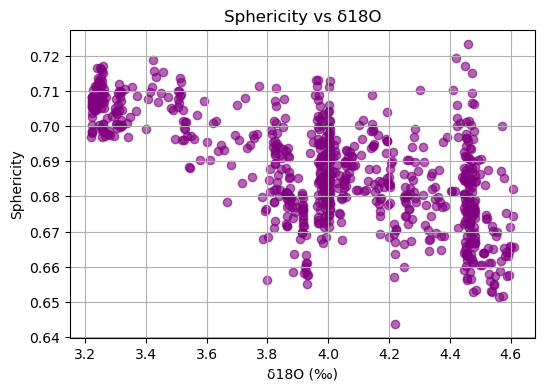

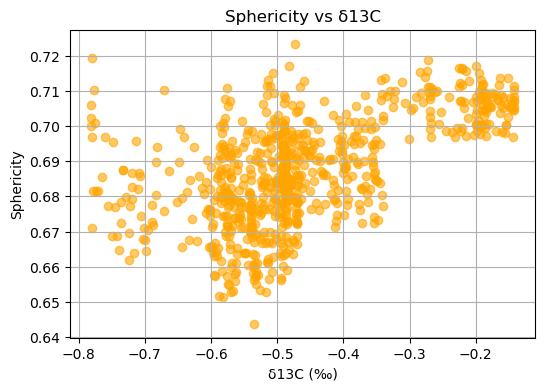

In [48]:
#Plot Sphericity vs d18O
plt.figure(figsize=(6, 4))
plt.scatter(shape_df["d18O"], shape_df["Size.Mean.Sphericity"], alpha=0.6, color='purple')
plt.xlabel("δ18O (‰)")
plt.ylabel("Sphericity")
plt.title("Sphericity vs δ18O")
plt.grid(True)
plt.show()

# Plot Sphericity vs δ13C
plt.figure(figsize=(6, 4))
plt.scatter(shape_df["d13C"], shape_df["Size.Mean.Sphericity"], alpha=0.6, color='orange')
plt.xlabel("δ13C (‰)")
plt.ylabel("Sphericity")
plt.title("Sphericity vs δ13C")
plt.grid(True)
plt.show()

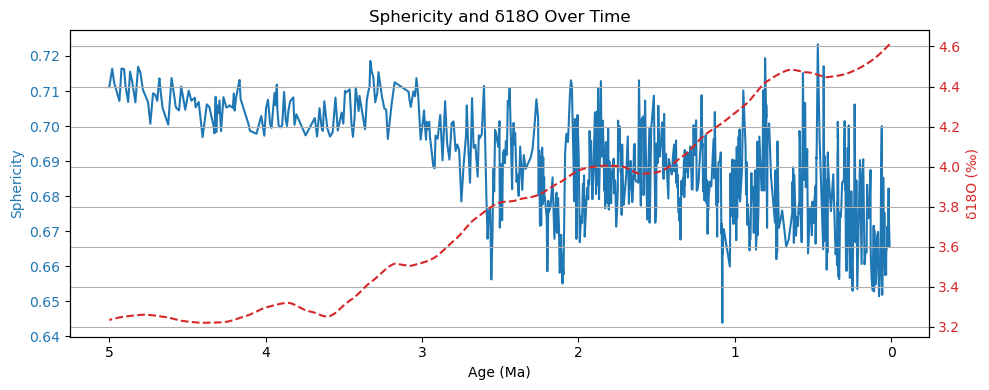

In [49]:
# Dual-axis time series
fig, ax1 = plt.subplots(figsize=(10, 4))

ax1.set_xlabel("Age (Ma)")
ax1.set_ylabel("Sphericity", color="tab:blue")
ax1.plot(shape_df["Ma"], shape_df["Size.Mean.Sphericity"], color="tab:blue", label="Sphericity")
ax1.invert_xaxis()  # Geological time moves from past to present
ax1.tick_params(axis='y', labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("δ18O (‰)", color="tab:red")
ax2.plot(shape_df["Ma"], shape_df["d18O"], color="tab:red", linestyle="--", label="δ18O")
ax2.tick_params(axis='y', labelcolor="tab:red")

plt.title("Sphericity and δ18O Over Time")
plt.grid(True)
plt.tight_layout()
plt.show()


Multivariate Regression Analysis: Predicting Shape Factor from Environmental and Morphological Variables

To quantify how both environmental factors (δ¹⁸O and δ¹³C) and morphological traits (Elongation and Sphericity) influence Shape Factor, we perform multivariate regression analysis. This approach helps understand the individual contributions of each factor to morphological changes.

In [32]:
corr_oxygen_carbon = shape_df["d18O"].corr(shape_df["d13C"])
print(f"Correlation between δ18O and δ13C: {corr_oxygen_carbon:.3f}")


Correlation between δ18O and δ13C: -0.792


In [ ]:
import statsmodels.api as sm

# Extract data for multivariate regression
X = shape_df[["d18O", "d13C"]]
X = sm.add_constant(X)  # Add an intercept
y = shape_df["ShapeFactor"]

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            ShapeFactor   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     112.8
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           1.17e-43
Time:                        10:20:34   Log-Likelihood:                 2280.6
No. Observations:                 769   AIC:                            -4555.
Df Residuals:                     766   BIC:                            -4541.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8706      0.006    153.371      0.0

In [ ]:
import statsmodels.api as sm

# Extract Elongation and Sphericity
X = shape_df[["d18O", "d13C", "Size.Mean.Elongation", "Size.Mean.Sphericity"]]
X = sm.add_constant(X)  # Adding intercept

y = shape_df["ShapeFactor"]

# Fit the multivariate regression model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            ShapeFactor   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     93.66
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           7.99e-65
Time:                        10:20:34   Log-Likelihood:                 2334.8
No. Observations:                 769   AIC:                            -4660.
Df Residuals:                     764   BIC:                            -4636.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.7187 

Incorporating both environmental and morphological variables allows for a more comprehensive model of morphological adaptation.It helps us determine whether Shape Factor is primarily influenced by external climate drivers or by internal morphological constraints.

It provides us statistically-backed insights for interpreting the foraminiferal adaptation to long-term environmental changes.

Correlation Matrix Visualization: Shape Parameters and Isotopic Data

To investigate relationships between shape parameters (Shape Factor, Elongation, Sphericity) and isotopic environmental proxies (δ¹⁸O and δ¹³C), we compute and visualise correlation matrix using a heatmap.

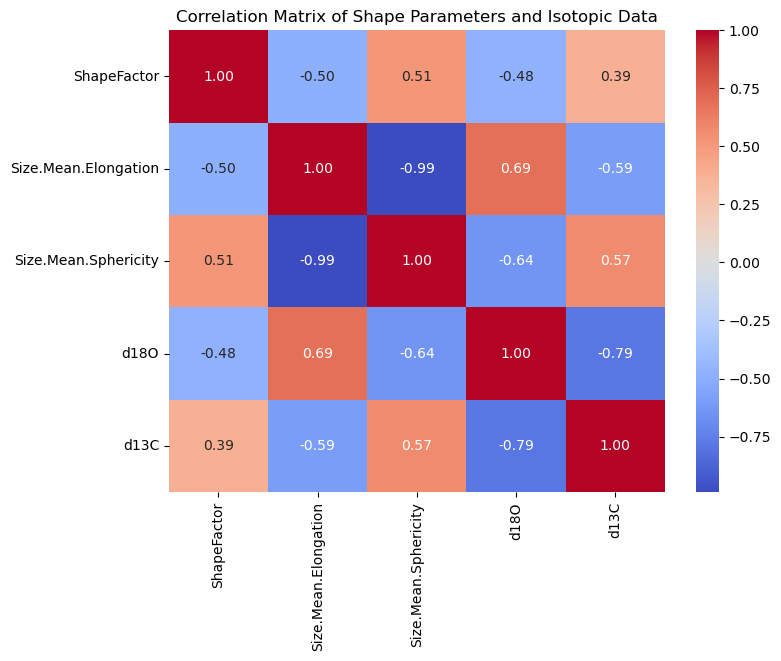

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_data = shape_df[["ShapeFactor", "Size.Mean.Elongation", "Size.Mean.Sphericity", "d18O", "d13C"]]

# Computing the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Shape Parameters and Isotopic Data")
plt.show()


In [ ]:
# Manually calculating the correlation coefficient for Sphericity with d13C
sphericity = shape_df['Size.Mean.Sphericity']
d13C = shape_df['d13C']

# Covariance and standard deviations
covariance = ((sphericity - sphericity.mean()) * (d13C - d13C.mean())).mean()
std_sphericity = sphericity.std()
std_d13C = d13C.std()

# Manual correlation calculation
manual_corr = covariance / (std_sphericity * std_d13C)

manual_corr


0.5663060839285172

To check if Shape Factor data follows a normal distribution, we use a histogram with an overlaid normal curve and a Q-Q plot. Verifying normality is important for statistical analyses that assume normally distributed residuals, such as regression.

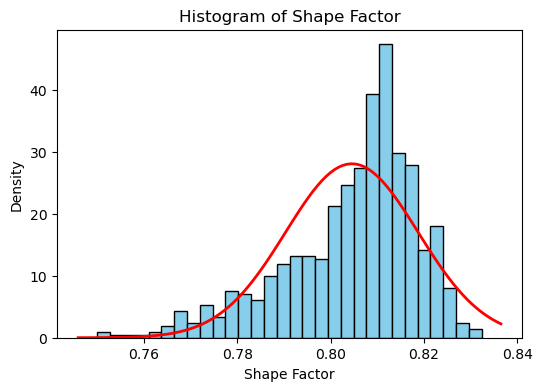

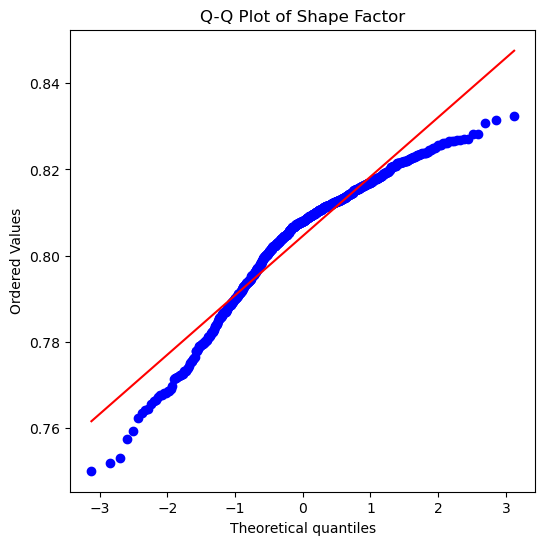

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Checking normality for Shape Factor
data = shape_df["ShapeFactor"].dropna()

# Histogram
plt.figure(figsize=(6, 4))
plt.hist(data, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title("Histogram of Shape Factor")
plt.xlabel("Shape Factor")
plt.ylabel("Density")

# Overlay the normal distribution curve
mu, std = stats.norm.fit(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.show()

# Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot of Shape Factor")
plt.show()


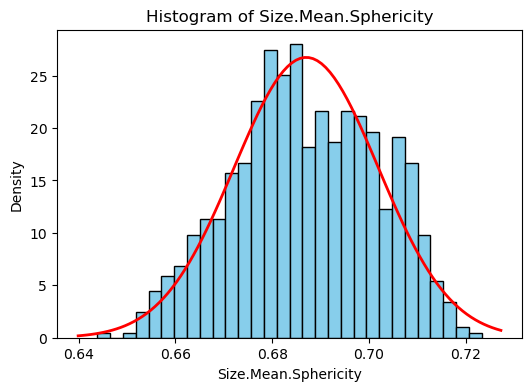

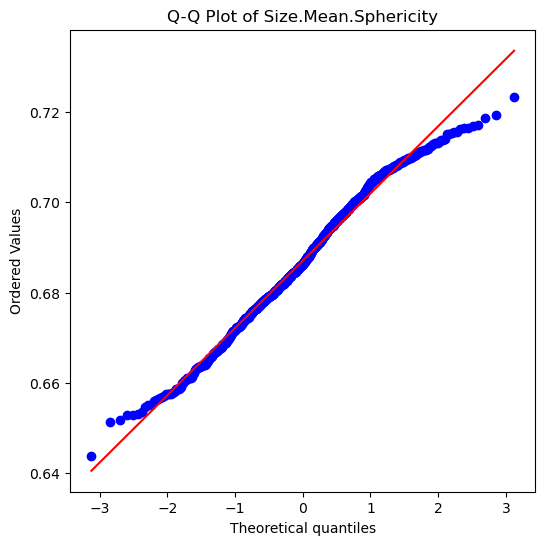

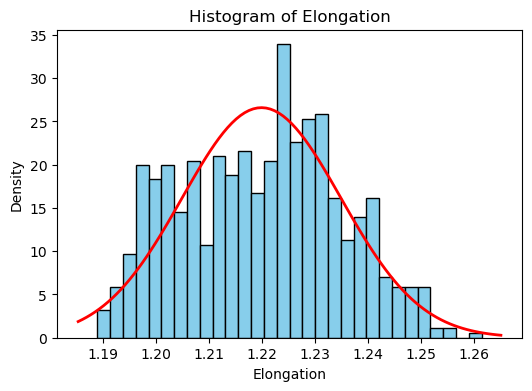

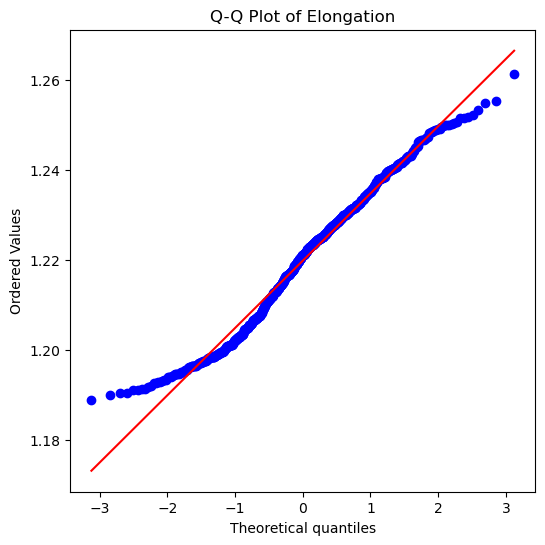

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_normality(data, title):
    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=30, color='skyblue', edgecolor='black', density=True)
    plt.title(f"Histogram of {title}")
    plt.xlabel(title)
    plt.ylabel("Density")
    
    # Overlay the normal distribution curve
    mu, std = stats.norm.fit(data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'r', linewidth=2)
    plt.show()

    # Q-Q Plot
    plt.figure(figsize=(6, 6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {title}")
    plt.show()

# Sphericity
sphericity_data = shape_df["Size.Mean.Sphericity"].dropna()
plot_normality(sphericity_data, "Size.Mean.Sphericity")

# Elongation
elongation_data = shape_df["Size.Mean.Elongation"].dropna()
plot_normality(elongation_data, "Elongation")


Statistical Significance of Correlations: Shape Parameters vs Isotopes

To ensure that the observed correlations between shape parameters (Sphericity, Elongation, Shape Factor) and isotopic proxies (δ¹⁸O, δ¹³C) are not due to random chance, we calculate both the Pearson correlation coefficient and the associated p-values.

In [ ]:
from scipy.stats import pearsonr

# Calculating statistical significance (p-value) for the correlations between shape parameters and isotopes

# Sphericity correlations
corr_d18O_sphericity, p_value_d18O_sphericity = pearsonr(shape_df["Size.Mean.Sphericity"], shape_df["d18O"])
corr_d13C_sphericity, p_value_d13C_sphericity = pearsonr(shape_df["Size.Mean.Sphericity"], shape_df["d13C"])

# Elongation correlations
corr_d18O_elongation, p_value_d18O_elongation = pearsonr(shape_df["Size.Mean.Elongation"], shape_df["d18O"])
corr_d13C_elongation, p_value_d13C_elongation = pearsonr(shape_df["Size.Mean.Elongation"], shape_df["d13C"])

# Shape Factor correlations
corr_d18O_shapefactor, p_value_d18O_shapefactor = pearsonr(shape_df["ShapeFactor"], shape_df["d18O"])
corr_d13C_shapefactor, p_value_d13C_shapefactor = pearsonr(shape_df["ShapeFactor"], shape_df["d13C"])

# Creating a DataFrame to summarize the significance results
significance_results = pd.DataFrame({
    "Shape Parameter": ["Sphericity", "Sphericity", "Elongation", "Elongation", "Shape Factor", "Shape Factor"],
    "Isotope": ["δ18O", "δ13C", "δ18O", "δ13C", "δ18O", "δ13C"],
    "Correlation Coefficient": [corr_d18O_sphericity, corr_d13C_sphericity, corr_d18O_elongation, corr_d13C_elongation, corr_d18O_shapefactor, corr_d13C_shapefactor],
    "P-Value": [p_value_d18O_sphericity, p_value_d13C_sphericity, p_value_d18O_elongation, p_value_d13C_elongation, p_value_d18O_shapefactor, p_value_d13C_shapefactor]
})

significance_results


,Shape Parameter,Isotope,Correlation Coefficient,P-Value
0,Sphericity,δ18O,-0.640988,3.380631e-90
1,Sphericity,δ13C,0.567043,1.243284e-66
2,Elongation,δ18O,0.685013,1.320389e-107
3,Elongation,δ13C,-0.594759,9.455977e-75
4,Shape Factor,δ18O,-0.476773,6.739162e-45
5,Shape Factor,δ13C,0.385836,1.055353e-28


Shape Parameters and δ¹⁸O Over Geological Time

Visualising how Shape Factor, Sphericity, and Elongation evolve over time and how their trends relate to changes in δ¹⁸O, an important climatic proxy indicating temperature and ice volume shifts.

This combined view helps us assess whether morphological changes relate with climatic shifts (δ¹⁸O variations).


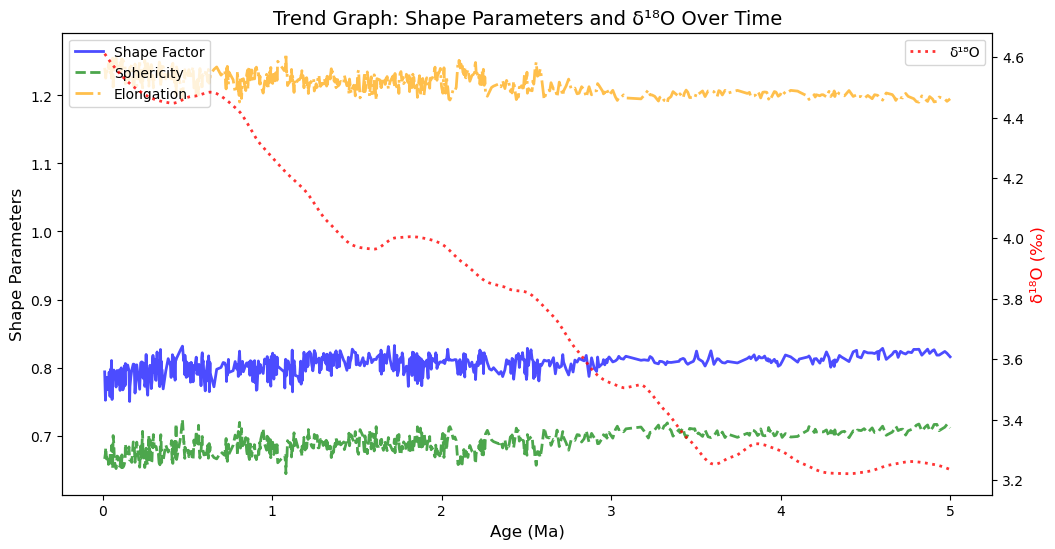

In [50]:
# Visualising of shape parameters and δ¹⁸O over time
plt.figure(figsize=(12, 6))


plt.plot(shape_df['Ma'], shape_df['ShapeFactor'], label='Shape Factor', color='blue', linestyle='-', linewidth=2, alpha=0.7)
plt.plot(shape_df['Ma'], shape_df['Size.Mean.Sphericity'], label='Sphericity', color='green', linestyle='--', linewidth=2, alpha=0.7)
plt.plot(shape_df['Ma'], shape_df['Size.Mean.Elongation'], label='Elongation', color='orange', linestyle='-.', linewidth=2, alpha=0.7)

# Plot δ18O on the secondary y-axis with a clear color distinction
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(shape_df['Ma'], shape_df['d18O'], label='δ¹⁸O', color='red', linestyle=':', linewidth=2, alpha=0.8)

ax.set_xlabel('Age (Ma)', fontsize=12)
ax.set_ylabel('Shape Parameters', fontsize=12)
ax2.set_ylabel('δ¹⁸O (‰)', color='red', fontsize=12)
plt.title('Trend Graph: Shape Parameters and δ¹⁸O Over Time', fontsize=14)

ax.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

plt.show()
